In [1]:
import numpy as np
import datajoint as dj
import time
import pymeshfix
import os
import datetime
import calcification_Module as cm
from meshparty import trimesh_io

#for supressing the output
import os, contextlib
import pathlib
import subprocess

#for error counting
from collections import Counter

#for reading in the new raw_skeleton files
import csv

In [2]:
#setting the address and the username
dj.config['database.host'] = '10.28.0.34'
dj.config['database.user'] = 'celiib'
dj.config['database.password'] = 'newceliipass'
dj.config['safemode']=True
dj.config["display.limit"] = 20

schema = dj.schema('microns_ta3p100')
ta3p100 = dj.create_virtual_module('ta3p100', 'microns_ta3p100')


Connecting celiib@10.28.0.34:3306


In [4]:
ta3p100.ContactCorrelation()

segmentation segmentation id,segment_id segment id unique within each Segmentation,segment_b id of the postsynaptic neuron,n_seg_a n_presyns contacting onto segment_id,n_seg_b n_presyns contacting onto segment_b,n_seg_shared n_presyns contacting onto both segment_id and segment_b,n_seg_union n_presyns contacting either segment_id or segment_b,n_seg_shared_converted n_presyns contacting onto both and converting on at least 1 postsyn,n_seg_a_converted n_presyns contacting onto both and converting on postsyna a,n_seg_a_converted_prop proportion of n_presyns contacting onto both which convert at least onto postsyna a,n_seg_b_converted n_presyns contacting onto both and converting on postsyna b,n_seg_b_converted_prop proportion of n_presyns contacting onto both which convert at least onto postsyna b,binary_conversion_pearson pearson correlation for binary n_synapse/n_contact rate,binary_conversion_cosine cosine similarity correlation for binary n_synapse/n_contact rate,binary_conv_jaccard_ones_ratio a / (a + b + c + d) for jaccard similarity of binary conversion rate,binary_conv_jaccard_matching_ratio ( a + d )/ (a + b + c + d) for jaccard similarity of binary conversion rate,conversion_pearson Pearson correlation for n_synapse/n_contact rate,conversion_cosine cosine similarity for n_synapse/n_contact rate,density_pearson Pearson correlation for n_synapse/postsyn_length rate,density_cosine cosine similarity for n_synapse/postsyn_length rate,synapse_volume_mean_pearson Pearson correlation for mean of synaptic volume,synapse_volume_mean_cosine cosine similarity for mean of synaptic volume,synapse_vol_density_pearson Pearson correlation for n_synapses*synapse_sizes_mean/postsyn_length rate,synapse_vol_density_cosine cosine similarity for n_synapses*synapse_sizes_mean/postsyn_length rate,binary_conversion_pearson_converted pearson correlation for binary n_synapse/n_contact rate for axon group with at least 1 conversion,binary_conversion_cosine_converted cosine similarity correlation for binary n_synapse/n_contact rate for axon group with at least 1 conversion,binary_conv_jaccard_ones_ratio_converted a / (a + b + c + d) for jaccard similarity of binary conversion rate with at least 1 conversion,binary_conv_jaccard_matching_ratio_converted ( a + d )/ (a + b + c + d) for jaccard similarity of binary conversion rate with at least 1 conversion,conversion_pearson_converted Pearson correlation for n_synapse/n_contact rate for axon group with at least 1 conversion,conversion_cosine_converted cosine similarity for n_synapse/n_contact rate for axon group with at least 1 conversion,density_pearson_converted Pearson correlation for n_synapse/postsyn_length rate for axon group with at least 1 conversion,density_cosine_converted cosine similarity for n_synapse/postsyn_length rate for axon group with at least 1 conversion,synapse_volume_mean_pearson_converted Pearson correlation for mean of synaptic volume for axon group with at least 1 conversion,synapse_volume_mean_cosine_converted cosine similarity for mean of synaptic volume for axon group with at least 1 conversion,synapse_vol_density_pearson_converted Pearson correlation for n_synapses*synapse_sizes_mean/postsyn_length rate for axon group with at least 1 conversion,synapse_vol_density_cosine_converted cosine similarity for n_synapses*synapse_sizes_mean/postsyn_length rate for axon group with at least 1 conversion
2,648518346341352006,648518346341352223,1420,1262,171,2511,14,7,0.5,8,0.571429,0.0939914,0.133631,0.00584795,0.923977,0.0773333,0.113147,-0.00691423,0.0138628,0.0889,0.114477,0.0121817,0.0360746,-0.866025,0.133631,0.0714286,0.0714286,-0.687496,0.113147,-0.323057,0.0138628,-0.355318,0.114477,-0.376675,0.0360746
2,648518346341352006,648518346341353019,1420,76,0,1496,0,0,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,648518346341352006,648518346341353186,1420,1420,119,2721,6,3,0.5,3,0.5,-0.0258621,0.0,0.0,0.94958,-0.0258621,0.0,

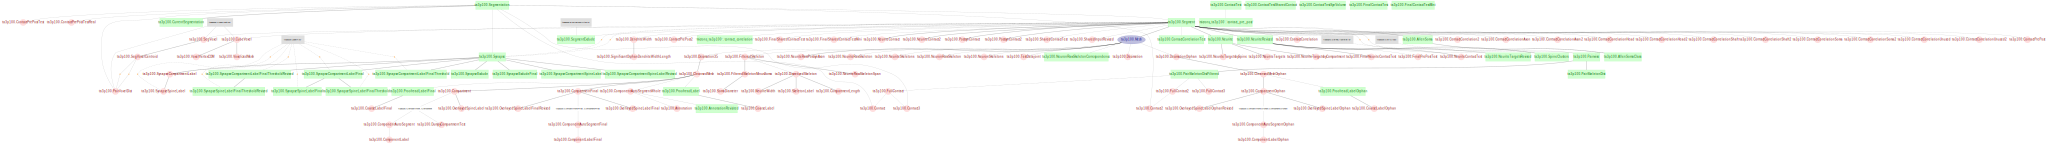

In [3]:
dj.ERD(ta3p100)

# MAKING PRE POST TEST TABLE

In [94]:
#Create a fake Contacts table
@schema
class ContactPrePostTest(dj.Computed):
    definition="""
    ->ta3p100.Segmentation
    presyn :bigint unsigned #id of the presynaptic neurite 
    postsyn :bigint unsigned #id of the postsynaptic neuron
    ---
    

    total_total_length   :bigint unsigned #total total postsynaptic contact length
    total_n_syn   :bigint unsigned #total number of synapses
    total_n_contacts   :bigint unsigned #total number of contacts
    total_contact_conversion=null   :float #total synapse to contact ratio
    total_contact_density=null   :float #total synapse to contact length ratio
    apical_total_length   :bigint unsigned #apical total postsynaptic contact length
    apical_n_syn   :bigint unsigned #apical number of synapses
    apical_n_contacts   :bigint unsigned #apical number of contacts
    apical_contact_conversion=null   :float #apical synapse to contact ratio
    apical_contact_density=null   :float #apical synapse to contact length ratio
    basal_total_length   :bigint unsigned #basal total postsynaptic contact length
    basal_n_syn   :bigint unsigned #basal number of synapses
    basal_n_contacts   :bigint unsigned #basal number of contacts
    basal_contact_conversion=null   :float #basal synapse to contact ratio
    basal_contact_density=null   :float #basal synapse to contact length ratio
    oblique_total_length   :bigint unsigned #oblique total postsynaptic contact length
    oblique_n_syn   :bigint unsigned #oblique number of synapses
    oblique_n_contacts   :bigint unsigned #oblique number of contacts
    oblique_contact_conversion=null  :float #oblique synapse to contact ratio
    oblique_contact_density=null   :float #oblique synapse to contact length ratio
    soma_total_length   :bigint unsigned #soma total postsynaptic contact length
    soma_n_syn   :bigint unsigned #soma number of synapses
    soma_n_contacts   :bigint unsigned #soma number of contacts
    soma_contact_conversion=null   :float #soma synapse to contact ratio
    soma_contact_density=null   :float #soma synapse to contact length ratio
    dendrites_total_length   :bigint unsigned #dendrites total postsynaptic contact length
    dendrites_n_syn   :bigint unsigned #dendrites number of synapses
    dendrites_n_contacts   :bigint unsigned #dendrites number of contacts
    dendrites_contact_conversion=null   :float #dendrites synapse to contact ratio
    dendrites_contact_density=null   :float #dendrites synapse to contact length ratio
    axon_total_length   :bigint unsigned #axon total postsynaptic contact length
    axon_n_syn   :bigint unsigned #axon number of synapses
    axon_n_contacts   :bigint unsigned #axon number of contacts
    axon_contact_conversion=null   :float #axon synapse to contact ratio
    axon_contact_density=null   :float #axon synapse to contact length ratio
    
    
    """
    
    def make(self,key):
        #what investigating, how to only 
        contact_pre_post = dj.U("segmentation","presyn","postsyn").aggr(ta3p100.ContactTest.proj("presyn","postsyn","contact_postsyn_length","n_synapses","compartment_label"),
            total_total_length="sum(contact_postsyn_length)",
            total_n_syn ="sum( n_synapses )",
            total_n_contacts="count(*)",
            total_contact_conversion="if(count(*)=0,null,sum( n_synapses)/count(*))",
            total_contact_density="if(sum( contact_postsyn_length) = 0,null,sum( n_synapses)/sum( contact_postsyn_length))",

            apical_total_length= "sum( contact_postsyn_length * (compartment_label=2))",
            apical_n_syn= "sum( n_synapses * (compartment_label=2))",
            apical_n_contacts= "sum(compartment_label=2)",
            apical_contact_conversion= "if(sum(compartment_label=2)=0,null,sum( n_synapses * (compartment_label=2))/sum(compartment_label=2))",
            apical_contact_density= "if(sum( contact_postsyn_length * (compartment_label=2))=0,null,sum( n_synapses * (compartment_label=2))/sum( contact_postsyn_length * (compartment_label=2)))",

            basal_total_length= "sum( contact_postsyn_length * (compartment_label=3))",
            basal_n_syn= "sum( n_synapses * (compartment_label=3))",
            basal_n_contacts= "sum(compartment_label=3)",
            basal_contact_conversion= "if(sum(compartment_label=3)=0,null,sum( n_synapses * (compartment_label=3))/sum(compartment_label=3))",
            basal_contact_density=  "if(sum( contact_postsyn_length * (compartment_label=3))=0,null,sum( n_synapses * (compartment_label=2))/sum( contact_postsyn_length * (compartment_label=3)))",

            oblique_total_length= "sum( contact_postsyn_length * (compartment_label=4))",
            oblique_n_syn= "sum( n_synapses * (compartment_label=4))",
            oblique_n_contacts= "sum(compartment_label=4)",
            oblique_contact_conversion= "if(sum(compartment_label=4)=0,null,sum( n_synapses * (compartment_label=4))/sum(compartment_label=4))",
            oblique_contact_density=  "if(sum( contact_postsyn_length * (compartment_label=4))=0,null,sum( n_synapses * (compartment_label=4))/sum( contact_postsyn_length * (compartment_label=4)))",

            soma_total_length= "sum( contact_postsyn_length * (compartment_label=5))",
            soma_n_syn= "sum( n_synapses * (compartment_label=5))",
            soma_n_contacts= "sum(compartment_label=5)",
            soma_contact_conversion= "if(sum(compartment_label=5)=0,null,sum( n_synapses * (compartment_label=5))/sum(compartment_label=5))",
            soma_contact_density=  "if(sum( contact_postsyn_length * (compartment_label=5))=0,null,sum( n_synapses * (compartment_label=5))/sum( contact_postsyn_length * (compartment_label=5)))",

            dendrites_total_length= "sum( contact_postsyn_length * (compartment_label=8))",
            dendrites_n_syn= "sum( n_synapses * (compartment_label=8))",
            dendrites_n_contacts= "sum(compartment_label=8)",
            dendrites_contact_conversion= "if(sum(compartment_label=8)=0,null,sum( n_synapses * (compartment_label=8))/sum(compartment_label=8))",
            dendrites_contact_density=  "if(sum( contact_postsyn_length * (compartment_label=8))=0,null,sum( n_synapses * (compartment_label=8))/sum( contact_postsyn_length * (compartment_label=8)))",

            #AXON COMPUTATIONS
            axon_total_length= "sum( contact_postsyn_length * (compartment_label=6 OR compartment_label=7))",
            axon_n_syn= "sum( n_synapses * (compartment_label=6 OR compartment_label=7))",
            axon_n_contacts= "sum(compartment_label=6 OR compartment_label=7)",
            axon_contact_conversion= "if(sum(compartment_label=6 OR compartment_label=7)=0,null,sum( n_synapses * (compartment_label=6 OR compartment_label=7))/sum(compartment_label=6 OR compartment_label=7))",
            axon_contact_density= "if(sum( contact_postsyn_length * (compartment_label=6 OR compartment_label=7))=0,null,sum( n_synapses * (compartment_label=6 OR compartment_label=7))/sum( contact_postsyn_length * (compartment_label=6 OR compartment_label=7)))")


        self.insert(contact_pre_post,skip_duplicates=True)






# Creating Pre Post for the larger Contact Test Shared Input table

In [102]:
#ContactPrePostTestReal()

segmentation segmentation id,presyn id of the presynaptic neurite,postsyn id of the postsynaptic neuron,total_total_length total total postsynaptic contact length,total_n_syn total number of synapses,total_n_contacts total number of contacts,total_contact_conversion total synapse to contact ratio,total_contact_density total synapse to contact length ratio,apical_total_length apical total postsynaptic contact length,apical_n_syn apical number of synapses,apical_n_contacts apical number of contacts,apical_contact_conversion apical synapse to contact ratio,apical_contact_density apical synapse to contact length ratio,basal_total_length basal total postsynaptic contact length,basal_n_syn basal number of synapses,basal_n_contacts basal number of contacts,basal_contact_conversion basal synapse to contact ratio,basal_contact_density basal synapse to contact length ratio,oblique_total_length oblique total postsynaptic contact length,oblique_n_syn oblique number of synapses,oblique_n_contacts oblique number of contacts,oblique_contact_conversion oblique synapse to contact ratio,oblique_contact_density oblique synapse to contact length ratio,soma_total_length soma total postsynaptic contact length,soma_n_syn soma number of synapses,soma_n_contacts soma number of contacts,soma_contact_conversion soma synapse to contact ratio,soma_contact_density soma synapse to contact length ratio,dendrites_total_length dendrites total postsynaptic contact length,dendrites_n_syn dendrites number of synapses,dendrites_n_contacts dendrites number of contacts,dendrites_contact_conversion dendrites synapse to contact ratio,dendrites_contact_density dendrites synapse to contact length ratio,axon_total_length axon total postsynaptic contact length,axon_n_syn axon number of synapses,axon_n_contacts axon number of contacts,axon_contact_conversion axon synapse to contact ratio,axon_contact_density axon synapse to contact length ratio
2,648518346341351467,648518346341352006,311,48,7,6.85714,0.154386,0,0,0,nan,nan,109,17,2,8.5,0.0,9,4,1,4.0,0.436205,0,0,0,nan,nan,181,20,3,6.66667,0.110516,12,7,1,7.0,0.603448
2,648518346341351467,648518346341352223,84,15,2,7.5,0.178105,0,0,0,nan,nan,53,8,1,8.0,0.0,0,0,0,nan,nan,0,0,0,nan,nan,0,0,0,nan,nan,32,7,1,7.0,0.222152
2,648518346341351467,648518346341353019,180,8,3,2.66667,0.0444568,0,0,0,nan,nan,0,0,0,nan,nan,64,3,1,3.0,0.0465766,0,0,0,nan,nan,64,1,1,1.0,0.0155497,51,4,1,4.0,0.0780793
2,648518346341351467,648518346341353186,166,7,3,2.33333,0.0422756,0,0,0,nan,nan,76,1,1,1.0,0.0,0,0,0,nan,nan,0,0,0,nan,nan,81,5,1,5.0,0.0616979,9,1,1,1.0,0.110619
2,648518346341351467,648518346341353574,182,22,4,5.5,0.120932,0,0,0,nan,nan,0,0,0,nan,nan,153,21,3,7.0,0.137094,29,1,1,1.0,0.0347947,0,0,0,nan,nan,0,0,0,nan,nan
2,648518346341351503,648518346341352006,165,28,5,5.6,0.169934,0,0,0,nan,nan,26,5,1,5.0,0.0,64,5,1,5.0,0.0778452,30,10,1,10.0,0.332557,42,1,1,1.0,0.0239751,2,7,1,7.0,2.88066
2,648518346341351503,648518346341352223,113,15,4,3.75,0.133215,41,0,1,0.0,0.0,0,0,0,nan,nan,0,0,0,nan,nan,37,1,1,1.0,0.0267451,23,4,1,4.0,0.173536,11,10,1,10.0,0.910747
2,648518346341351503,648518346341353019,65,4,2,2.0,0.0617189,8,3,1,3.0,0.390117,0,0,0,nan,nan,0,0,0,nan,nan,0,0,0,nan,nan,0,0,0,nan,nan,57,1,1,1.0,0.017507
2,648518346341351503,648518346341353186,64,7,2,3.5,0.109838,0,0,0,nan,nan,0,0,0,nan,nan,0,0,0,nan,nan,0,0,0,nan,nan,0,0,0,nan,nan,64,7,2,3.5,0.109838
2,648518346341351503,648518346341353574,179,23,5,4.6,0.128707,73,8,1,8.0,0.109379,0,0,0,nan,nan,39,2,1,2.0,0.0518538,52,12,2,6.0,0.230061,15,1,1,1.0,0.0674309,0,0,0,nan,nan


In [100]:
#Create a fake Contacts table
@schema
class ContactPrePostTestReal(dj.Computed):
    definition="""
    ->ta3p100.Segmentation
    presyn :bigint unsigned #id of the presynaptic neurite 
    postsyn :bigint unsigned #id of the postsynaptic neuron
    ---
    

    total_total_length   :bigint unsigned #total total postsynaptic contact length
    total_n_syn   :bigint unsigned #total number of synapses
    total_n_contacts   :bigint unsigned #total number of contacts
    total_contact_conversion=null   :float #total synapse to contact ratio
    total_contact_density=null   :float #total synapse to contact length ratio
    apical_total_length   :bigint unsigned #apical total postsynaptic contact length
    apical_n_syn   :bigint unsigned #apical number of synapses
    apical_n_contacts   :bigint unsigned #apical number of contacts
    apical_contact_conversion=null   :float #apical synapse to contact ratio
    apical_contact_density=null   :float #apical synapse to contact length ratio
    basal_total_length   :bigint unsigned #basal total postsynaptic contact length
    basal_n_syn   :bigint unsigned #basal number of synapses
    basal_n_contacts   :bigint unsigned #basal number of contacts
    basal_contact_conversion=null   :float #basal synapse to contact ratio
    basal_contact_density=null   :float #basal synapse to contact length ratio
    oblique_total_length   :bigint unsigned #oblique total postsynaptic contact length
    oblique_n_syn   :bigint unsigned #oblique number of synapses
    oblique_n_contacts   :bigint unsigned #oblique number of contacts
    oblique_contact_conversion=null  :float #oblique synapse to contact ratio
    oblique_contact_density=null   :float #oblique synapse to contact length ratio
    soma_total_length   :bigint unsigned #soma total postsynaptic contact length
    soma_n_syn   :bigint unsigned #soma number of synapses
    soma_n_contacts   :bigint unsigned #soma number of contacts
    soma_contact_conversion=null   :float #soma synapse to contact ratio
    soma_contact_density=null   :float #soma synapse to contact length ratio
    dendrites_total_length   :bigint unsigned #dendrites total postsynaptic contact length
    dendrites_n_syn   :bigint unsigned #dendrites number of synapses
    dendrites_n_contacts   :bigint unsigned #dendrites number of contacts
    dendrites_contact_conversion=null   :float #dendrites synapse to contact ratio
    dendrites_contact_density=null   :float #dendrites synapse to contact length ratio
    axon_total_length   :bigint unsigned #axon total postsynaptic contact length
    axon_n_syn   :bigint unsigned #axon number of synapses
    axon_n_contacts   :bigint unsigned #axon number of contacts
    axon_contact_conversion=null   :float #axon synapse to contact ratio
    axon_contact_density=null   :float #axon synapse to contact length ratio
    
    
    """
    
    def make(self,key):
        #what investigating, how to only 
        contact_pre_post = dj.U("segmentation","presyn","postsyn").aggr(ta3p100.ContactTestSharedContact.proj("presyn","postsyn","contact_postsyn_length","n_synapses","compartment_label"),
            total_total_length="sum(contact_postsyn_length)",
            total_n_syn ="sum( n_synapses )",
            total_n_contacts="count(*)",
            total_contact_conversion="if(count(*)=0,null,sum( n_synapses)/count(*))",
            total_contact_density="if(sum( contact_postsyn_length) = 0,null,sum( n_synapses)/sum( contact_postsyn_length))",

            apical_total_length= "sum( contact_postsyn_length * (compartment_label=2))",
            apical_n_syn= "sum( n_synapses * (compartment_label=2))",
            apical_n_contacts= "sum(compartment_label=2)",
            apical_contact_conversion= "if(sum(compartment_label=2)=0,null,sum( n_synapses * (compartment_label=2))/sum(compartment_label=2))",
            apical_contact_density= "if(sum( contact_postsyn_length * (compartment_label=2))=0,null,sum( n_synapses * (compartment_label=2))/sum( contact_postsyn_length * (compartment_label=2)))",

            basal_total_length= "sum( contact_postsyn_length * (compartment_label=3))",
            basal_n_syn= "sum( n_synapses * (compartment_label=3))",
            basal_n_contacts= "sum(compartment_label=3)",
            basal_contact_conversion= "if(sum(compartment_label=3)=0,null,sum( n_synapses * (compartment_label=3))/sum(compartment_label=3))",
            basal_contact_density=  "if(sum( contact_postsyn_length * (compartment_label=3))=0,null,sum( n_synapses * (compartment_label=2))/sum( contact_postsyn_length * (compartment_label=3)))",

            oblique_total_length= "sum( contact_postsyn_length * (compartment_label=4))",
            oblique_n_syn= "sum( n_synapses * (compartment_label=4))",
            oblique_n_contacts= "sum(compartment_label=4)",
            oblique_contact_conversion= "if(sum(compartment_label=4)=0,null,sum( n_synapses * (compartment_label=4))/sum(compartment_label=4))",
            oblique_contact_density=  "if(sum( contact_postsyn_length * (compartment_label=4))=0,null,sum( n_synapses * (compartment_label=4))/sum( contact_postsyn_length * (compartment_label=4)))",

            soma_total_length= "sum( contact_postsyn_length * (compartment_label=5))",
            soma_n_syn= "sum( n_synapses * (compartment_label=5))",
            soma_n_contacts= "sum(compartment_label=5)",
            soma_contact_conversion= "if(sum(compartment_label=5)=0,null,sum( n_synapses * (compartment_label=5))/sum(compartment_label=5))",
            soma_contact_density=  "if(sum( contact_postsyn_length * (compartment_label=5))=0,null,sum( n_synapses * (compartment_label=5))/sum( contact_postsyn_length * (compartment_label=5)))",

            dendrites_total_length= "sum( contact_postsyn_length * (compartment_label=8))",
            dendrites_n_syn= "sum( n_synapses * (compartment_label=8))",
            dendrites_n_contacts= "sum(compartment_label=8)",
            dendrites_contact_conversion= "if(sum(compartment_label=8)=0,null,sum( n_synapses * (compartment_label=8))/sum(compartment_label=8))",
            dendrites_contact_density=  "if(sum( contact_postsyn_length * (compartment_label=8))=0,null,sum( n_synapses * (compartment_label=8))/sum( contact_postsyn_length * (compartment_label=8)))",

            #AXON COMPUTATIONS
            axon_total_length= "sum( contact_postsyn_length * (compartment_label=6 OR compartment_label=7))",
            axon_n_syn= "sum( n_synapses * (compartment_label=6 OR compartment_label=7))",
            axon_n_contacts= "sum(compartment_label=6 OR compartment_label=7)",
            axon_contact_conversion= "if(sum(compartment_label=6 OR compartment_label=7)=0,null,sum( n_synapses * (compartment_label=6 OR compartment_label=7))/sum(compartment_label=6 OR compartment_label=7))",
            axon_contact_density= "if(sum( contact_postsyn_length * (compartment_label=6 OR compartment_label=7))=0,null,sum( n_synapses * (compartment_label=6 OR compartment_label=7))/sum( contact_postsyn_length * (compartment_label=6 OR compartment_label=7)))")


        self.insert(contact_pre_post,skip_duplicates=True)






In [101]:
ContactPrePostTestReal.populate()

In [97]:
# #what investigating, how to only 

# contact_pre_post = dj.U("segmentation","presyn","postsyn").aggr(ta3p100.ContactTest.proj("presyn","postsyn","contact_postsyn_length","n_synapses","compartment_label"),
#             total_total_length="sum(contact_postsyn_length)",
#             total_n_syn ="sum( n_synapses )",
#             total_n_contacts="count(*)",
#             total_contact_conversion="if(count(*)=0,-1,sum( n_synapses)/count(*))",
#             total_contact_density="if(sum( contact_postsyn_length) = 0,-1,sum( n_synapses)/sum( contact_postsyn_length))",

#             apical_total_length= "sum( contact_postsyn_length * (compartment_label=2))",
#             apical_n_syn= "sum( n_synapses * (compartment_label=2))",
#             apical_n_contacts= "sum(compartment_label=2)",
#             apical_contact_conversion= "if(sum(compartment_label=2)=0,-1,sum( n_synapses * (compartment_label=2))/sum(compartment_label=2))",
#             apical_contact_density= "if(sum( contact_postsyn_length * (compartment_label=2))=0,-1,sum( n_synapses * (compartment_label=2))/sum( contact_postsyn_length * (compartment_label=2)))",

#             basal_total_length= "sum( contact_postsyn_length * (compartment_label=3))",
#             basal_n_syn= "sum( n_synapses * (compartment_label=3))",
#             basal_n_contacts= "sum(compartment_label=3)",
#             basal_contact_conversion= "if(sum(compartment_label=3)=0,-1,sum( n_synapses * (compartment_label=3))/sum(compartment_label=3))",
#             basal_contact_density=  "if(sum( contact_postsyn_length * (compartment_label=3))=0,-1,sum( n_synapses * (compartment_label=2))/sum( contact_postsyn_length * (compartment_label=3)))",

#             oblique_total_length= "sum( contact_postsyn_length * (compartment_label=4))",
#             oblique_n_syn= "sum( n_synapses * (compartment_label=4))",
#             oblique_n_contacts= "sum(compartment_label=4)",
#             oblique_contact_conversion= "if(sum(compartment_label=4)=0,-1,sum( n_synapses * (compartment_label=4))/sum(compartment_label=4))",
#             oblique_contact_density=  "if(sum( contact_postsyn_length * (compartment_label=4))=0,-1,sum( n_synapses * (compartment_label=4))/sum( contact_postsyn_length * (compartment_label=4)))",

#             soma_total_length= "sum( contact_postsyn_length * (compartment_label=5))",
#             soma_n_syn= "sum( n_synapses * (compartment_label=5))",
#             soma_n_contacts= "sum(compartment_label=5)",
#             soma_contact_conversion= "if(sum(compartment_label=5)=0,-1,sum( n_synapses * (compartment_label=5))/sum(compartment_label=5))",
#             soma_contact_density=  "if(sum( contact_postsyn_length * (compartment_label=5))=0,-1,sum( n_synapses * (compartment_label=5))/sum( contact_postsyn_length * (compartment_label=5)))",

#             dendrites_total_length= "sum( contact_postsyn_length * (compartment_label=8))",
#             dendrites_n_syn= "sum( n_synapses * (compartment_label=8))",
#             dendrites_n_contacts= "sum(compartment_label=8)",
#             dendrites_contact_conversion= "if(sum(compartment_label=8)=0,-1,sum( n_synapses * (compartment_label=8))/sum(compartment_label=8))",
#             dendrites_contact_density=  "if(sum( contact_postsyn_length * (compartment_label=8))=0,-1,sum( n_synapses * (compartment_label=8))/sum( contact_postsyn_length * (compartment_label=8)))",

#             #AXON COMPUTATIONS
#             axon_total_length= "sum( contact_postsyn_length * (compartment_label=6 OR compartment_label=7))",
#             axon_n_syn= "sum( n_synapses * (compartment_label=6 OR compartment_label=7))",
#             axon_n_contacts= "sum(compartment_label=6 OR compartment_label=7)",
#             axon_contact_conversion= "if(sum(compartment_label=6 OR compartment_label=7)=0,-1,sum( n_synapses * (compartment_label=6 OR compartment_label=7))/sum(compartment_label=6 OR compartment_label=7))",
#             axon_contact_density= "if(sum( contact_postsyn_length * (compartment_label=6 OR compartment_label=7))=0,-1,sum( n_synapses * (compartment_label=6 OR compartment_label=7))/sum( contact_postsyn_length * (compartment_label=6 OR compartment_label=7)))")

# ContactPrePostTest.insert(contact_pre_post)


In [95]:
###couldn't get the fill method to work
start_time = time.time()
ContactPrePostTest.populate()
print(f"Filling ContactPrePost took {time.time()-start_time} sec")

Filling ContactPrePost took 0.03596186637878418 sec


# CHECKING THAT PRE POST TABLE WAS CORRECT

In [15]:
#check did the right calculations
compartment_type = {
"apical":2,
"basal":3,
"oblique":4,
"soma":5,
"dendrites":8
}
#on

current_compartment = 4
restriction_key = dict(presyn=1003,postsyn=2003)


total_contacts = (ta3p100.ContactTest & restriction_key).fetch(as_dict=True)
print(total_contacts[0])

#in python and numpy calculate all of the percentages
#things to calculate: 

total_length_TOTAL = 0
n_syn_TOTAL= 0
n_contacts_TOTAL= 0
contact_conversion_TOTAL = 0
contact_density_TOTAL= 0

for ct_keys,ct_values in compartment_type.items():
    print("doing " + str(ct_keys))
    print()
    total_length = 0
    n_syn = 0
    n_contacts= 0
    contact_conversion = 0
    contact_density= 0

    for c in total_contacts:
        if c["compartment_label"] == ct_values:
            total_length += c["contact_postsyn_length"]
            n_syn +=c["n_synapses"]
            n_contacts += 1
        

    try:
        contact_conversion = n_syn/n_contacts
    except ZeroDivisionError:
        contact_conversion="None"
    
    try:
        contact_density = n_syn/total_length
    except ZeroDivisionError:
        contact_density="None"
    
    print(total_length,n_syn,n_contacts,contact_conversion,contact_density)
    
    total_length_TOTAL +=total_length
    n_syn_TOTAL+= n_syn
    n_contacts_TOTAL += n_contacts
    


#calculate the axon values
total_length = 0
n_syn = 0
n_contacts= 0
contact_conversion = 0
contact_density= 0


for c in total_contacts:
    if c["compartment_label"] == 6 or c["compartment_label"] == 7:
        total_length += c["contact_postsyn_length"]
        n_syn +=c["n_synapses"]
        n_contacts += 1
        
try:
    contact_conversion = n_syn/n_contacts
except ZeroDivisionError:
    contact_conversion="None"

try:
    contact_density = n_syn/total_length
except ZeroDivisionError:
    contact_density="None"

print("doing axons")
print(total_length,n_syn,n_contacts,contact_conversion,contact_density)

total_length_TOTAL +=total_length
n_syn_TOTAL+= n_syn
n_contacts_TOTAL += n_contacts
    
        
#now calculate the totals

try:
    contact_conversion_TOTAL = n_syn_TOTAL/n_contacts_TOTAL
except ZeroDivisionError:
    contact_conversion_TOTAL="None"

try:
    contact_density_TOTAL = n_syn_TOTAL/total_length_TOTAL
except ZeroDivisionError:
    contact_density_TOTAL="None"

print("\ndoing totals")
print(total_length_TOTAL,n_syn_TOTAL,n_contacts_TOTAL,contact_conversion_TOTAL,contact_density_TOTAL)




OrderedDict([('segmentation', 2), ('contact_id', 7), ('presyn', 1003), ('postsyn', 2003), ('contact_index', 1), ('contact_x', 39), ('contact_y', 38), ('contact_z', 6), ('contact_postsyn_length', 94.35), ('n_synapses', 7), ('compartment_label', 3)])
doing apical

63.68 8 1 8.0 0.12562814070351758
doing basal

94.35 7 1 7.0 0.07419183889772125
doing oblique

0 0 0 None None
doing soma

8.55 8 1 8.0 0.935672514619883
doing dendrites

13.39 1 1 1.0 0.07468259895444361
doing axons
66.97 10 2 5.0 0.1493205913095416

doing totals
246.94000000000003 34 6 5.666666666666667 0.1376852676763586


In [16]:
 contact_pre_post & restriction_key

segmentation proofreading stage,presyn,postsyn,total_total_length calculated attribute,total_n_syn calculated attribute,total_n_contacts calculated attribute,total_contact_conversion calculated attribute,total_contact_density calculated attribute,apical_total_length calculated attribute,apical_n_syn calculated attribute,apical_n_contacts calculated attribute,apical_contact_conversion calculated attribute,apical_contact_density calculated attribute,basal_total_length calculated attribute,basal_n_syn calculated attribute,basal_n_contacts calculated attribute,basal_contact_conversion calculated attribute,basal_contact_density calculated attribute,oblique_total_length calculated attribute,oblique_n_syn calculated attribute,oblique_n_contacts calculated attribute,oblique_contact_conversion calculated attribute,oblique_contact_density calculated attribute,soma_total_length calculated attribute,soma_n_syn calculated attribute,soma_n_contacts calculated attribute,soma_contact_conversion calculated attribute,soma_contact_density calculated attribute,dendrites_total_length calculated attribute,dendrites_n_syn calculated attribute,dendrites_n_contacts calculated attribute,dendrites_contact_conversion calculated attribute,dendrites_contact_density calculated attribute,axon_total_length calculated attribute,axon_n_syn calculated attribute,axon_n_contacts calculated attribute,axon_contact_conversion calculated attribute,axon_contact_density calculated attribute
2,1003,2003,246.93999767303467,34,6,5.6667,0.13768526897379463,63.68000030517578,8,1,8.0000,0.12562814010146567,94.3499984741211,7,1,7.0000,0.07419184009759155,0.0,0,0,None,None,8.550000190734863,8,1,8.0000,0.9356724937467409,13.390000343322754,1,1,1.0000,0.07468259703956423,66.96999835968018,10,2,5.0000,0.14932059496690356


# CREATING RANDOM CONTACT TEST TABLE

In [ ]:
contact_data = (ta3p100.ContactTest() & "compartment_label=2" & "postsyn=2005").fetch(as_dict=True)
contact_data
# print(distances)
# print(sum(distances))

total_length = 0
n_syn = 0
n_contacts= 0
contact_conversion = 0
contact_density= 0
for c in contact_data:
    total_length += c["contact_postsyn_length"]
    n_syn +=c["n_synapses"]
    n_contacts += 1

contact_conversion = n_syn/n_contacts
contact_density = n_syn/total_length

print(total_length,n_syn,n_contacts,contact_conversion,contact_density)

In [ ]:
postsyn = [2001,2002,2003,2004,2005]

import math
import random
for x in range(10):
    #print(random.randint(1,101))
    print(postsyn[math.floor(random.randint(0,4))])

print(math.floor(4.2))

presyns = [1001,1002,1003,1004]
postsyns = [2001,2002,2003,2004,2005]

#postsyn[math.floor(randint(0,5))]

dict_array = []
for i in range(0,100):
    insert_dict = dict(segmentation=2,contact_id=i,
                   presyn=presyns[random.randint(0,len(presyns)-1)],
                   postsyn=postsyns[random.randint(0,len(postsyns)-1)],
                   contact_index=random.randint(0,2),
                   contact_x=random.randint(0,100),
                   contact_y=random.randint(0,100),
                   contact_z=random.randint(0,100),
                   contact_postsyn_length = round(random.uniform(1,100), 2),
                   n_synapses=random.randint(0,10),
                   compartment_label = random.randint(2,8)

                      )
    dict_array.append(insert_dict)
    

    
    
    
ContactTest.insert(dict_array,skip_duplicates=True)

    

# AUTOMATICALLY GENERATING CODE FOR CONTACT PRE POST

In [17]:
compartment_type = {
"apical":2,
"basal":3,
"oblique":4,
"soma":5,
"dendrites":8
}
#ones not doing:   "total":, "axon":


total_length ="sum( contact_postsyn_length * (compartment_label=2))",
n_syn ="sum( n_synapses * (compartment_label=2))",
n_contacts="sum(compartment_label=2)",
contact_conversion="sum( n_synapses * (compartment_label=2))/sum(compartment_label=2)",
contact_density="sum( n_synapses * (compartment_label=2))/sum( contact_postsyn_length * (compartment_label=2))"

data_type = {
    "total_length":["bigint unsigned","total postsynaptic contact length","sum( contact_postsyn_length * (compartment_label=","))"],
    "n_syn":["bigint unsigned","number of synapses","sum( n_synapses * (compartment_label=","))"],
    "n_contacts":["bigint unsigned","number of contacts","sum(compartment_label=",")"],
    "contact_conversion":["float","synapse to contact ratio","sum( n_synapses * (compartment_label=","))"
                          ,"/sum(compartment_label=",")"],
    "contact_density":["float","synapse to contact length ratio","sum( n_synapses * (compartment_label=","))/",
                      "sum( contact_postsyn_length * (compartment_label=","))"]
}


# synapses = sum(n_synapses)
# contacts = count(*)
# contact_conversion = sum(n_synapses)/count(*)
# contact_density = sum(n_synapses)/sum(post_syn length)
    
    #genereate the table header

extra_headers = ["total", "axon"]
for c in list(compartment_type.keys()) + extra_headers:
    for keys,values in data_type.items():
        print(str(c) + "_" + str(keys) + "   :" + str(values[0]) + " #" + str(c) + " " + str(values[1]))
        
print("\n\n")



for keys_comp,values_comp in compartment_type.items():
    print("")
    for keys_data,values_data in data_type.items():
        base_string = str(keys_comp) + "_" + str(keys_data) + "= " 
        
        start_counter = 2
        rounds = (len(values_data)-2)/2
        base_string += '"'
        for i in range(0,int(rounds)):
            base_string += values_data[start_counter] + str(values_comp) + values_data[start_counter + 1]
            start_counter +=2
        base_string += '",'
        print(base_string)

apical_total_length   :bigint unsigned #apical total postsynaptic contact length
apical_n_syn   :bigint unsigned #apical number of synapses
apical_n_contacts   :bigint unsigned #apical number of contacts
apical_contact_conversion   :float #apical synapse to contact ratio
apical_contact_density   :float #apical synapse to contact length ratio
basal_total_length   :bigint unsigned #basal total postsynaptic contact length
basal_n_syn   :bigint unsigned #basal number of synapses
basal_n_contacts   :bigint unsigned #basal number of contacts
basal_contact_conversion   :float #basal synapse to contact ratio
basal_contact_density   :float #basal synapse to contact length ratio
oblique_total_length   :bigint unsigned #oblique total postsynaptic contact length
oblique_n_syn   :bigint unsigned #oblique number of synapses
oblique_n_contacts   :bigint unsigned #oblique number of contacts
oblique_contact_conversion   :float #oblique synapse to contact ratio
oblique_contact_density   :float #oblique 